# Choosing hyperparameters

After the exercise in the last chapter, you're hopefully thinking "why am I spending my time trying different values of `n_neighbors`, can't it do this automatically?" If so, you're in luck!

It is a very common thing to need to try out a bunch of different values for your hyperparameters and so scikit-learn provides us with some tools to help out.

Let's do a similar thing to the last chapter, but load a different file this time. One with four different classes and follow through the usual steps:

In [1]:
import pandas as pd

data = pd.read_csv("https://milliams.com/courses/applied_data_analysis/blobs.csv")
X = data[["x1", "x2"]]
y = data["y"]

<Axes: xlabel='x1', ylabel='x2'>

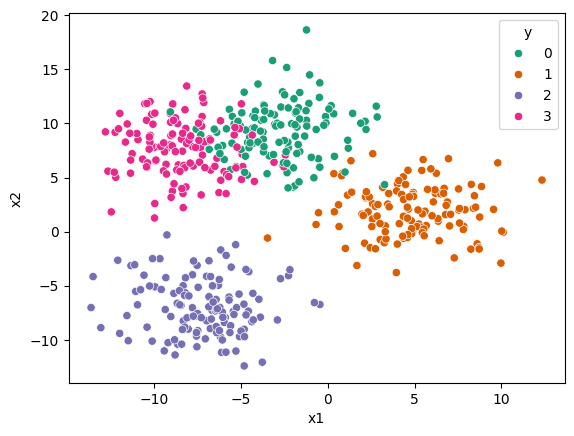

In [2]:
import seaborn as sns

sns.scatterplot(data=data, x="x1", y="x2", hue="y", palette="Dark2")

In [3]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y)

The tools that allows us to do the hyper-parameter searching is called [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) which will rerun the model training for every possible hyperparameter that we pass it.

The `GridSearchCV` constructor takes two things:
 1. the model that we want to explore,
 2. a dictionary containing the hyper-parameter values we want to test.

In this case, we are asking it to try every value of `n_neighbors` from 1 to 49 and it will use the training data to choose the best value.

In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

hyperparameters = {
    "n_neighbors" : range(1, 175),
}
model = GridSearchCV(KNeighborsClassifier(), hyperparameters)
model.fit(train_X, train_y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 175)})

The best way to visualise the data is to plot it. We can do this by grabbing the `cv_results_` attribute of `GridSearchCV` and plotting the `mean_test_score` against the value of `n_neighbors`. `GridSearchCV` will run each experiment multiple times with different splits of training and validation data to provide some measure of uncertainty of the score:

<Axes: xlabel='param_n_neighbors', ylabel='mean_test_score'>

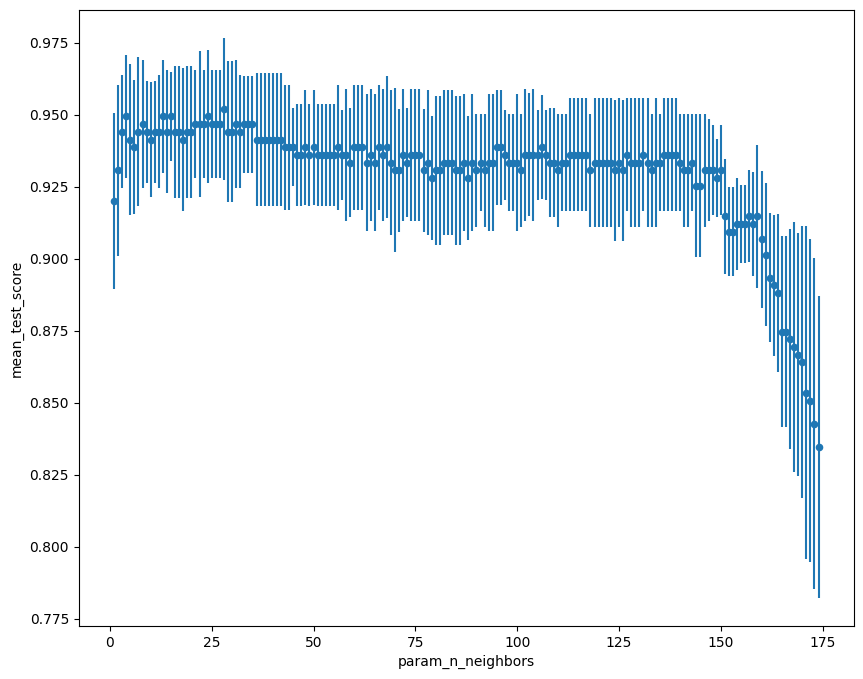

In [5]:
cv_results = pd.DataFrame(model.cv_results_)
cv_results.plot.scatter("param_n_neighbors", "mean_test_score", yerr="std_test_score", figsize=(10,8))

One thing that `GridSearchCV` does, once it has scanned through all the parameters, is do a final fit using the whole training data set using the best hyperparameters from the search. This allows you to use the `GridSearchCV` object `model` as if it were a `KNeighborsClassifier` object.

<Axes: xlabel='x1', ylabel='x2'>

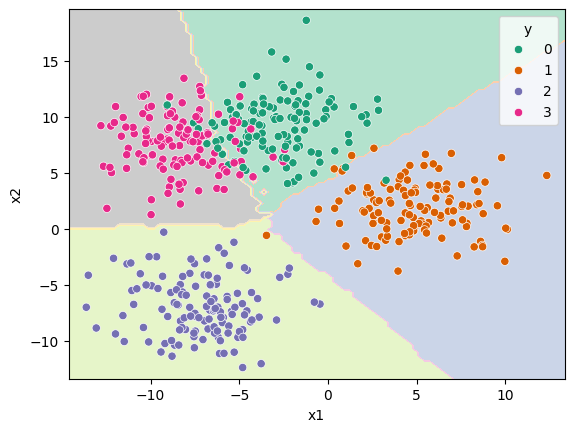

In [6]:
from sklearn.inspection import DecisionBoundaryDisplay

DecisionBoundaryDisplay.from_estimator(model, X, cmap="Pastel2")
sns.scatterplot(data=X, x="x1", y="x2", hue=y, palette="Dark2")

or use it directly with `predict`:

In [7]:
new_X = pd.DataFrame({
    "x1": [0, -10, 5, -5],
    "x2": [10, 5, 0, -10],
})

model.predict(new_X)

array([0, 3, 1, 2])

or measure its performance against the test data set:

In [8]:
model.score(test_X, test_y)

0.928

Using something like `GridSearchCV` allows you to find the best hyperparameters for your models while keeping them working most generally.

### Exercise

Grab the [Iris data set from scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html). This time we will simplify it down to only two features (sepal length and sepal width) to simplity the visualisation.

```python
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

X, y = load_iris(as_frame=True, return_X_y=True)
X = X[["sepal length (cm)", "sepal width (cm)"]]  # Grab just two of the features

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)
```

Using `GridSearchCV`, find the best value of `n_neighbors` and print the score of that model when run over the test data set.

[<small>answer</small>](answer_gridsearch_knn_iris.ipynb)